# ANLY580 HW1: Sentiment Analysis of English Twitter Data

Group name: 3+1<br>
Group member: Yeqing Liu, Huahui Deng, Han Zhang, Xiner Ning<br>
Date: 10/10/2019<br>

## Task 1: Exploratory Data analysis

### Input data

In [1]:
import numpy as np
import re
import string
from collections import Counter
import csv
import nltk
from nltk.tokenize import TweetTokenizer
from nltk.tokenize import casual_tokenize
from nltk.probability import FreqDist
from nltk.util import ngrams
from nltk.util import bigrams
from nltk.lm import NgramCounter
from nltk.corpus import stopwords
import matplotlib
import matplotlib.pyplot as plt

punctuation = list(string.punctuation) + ['…', '...','’']
stop_words = stopwords.words('english') + ['rt', 'via']

In [2]:
with open('INPUT.txt',encoding='utf-8') as file:
    input_as_list = file.readlines()
    print("The total number of tweets: ", len(input_as_list))

The total number of tweets:  12284


In [3]:
tweet_text_list = []
corpus = []
total_word = []
total_char = []
tweet_list =[]

def process(tweet):
    #normalize text in each tweet: to lower case & remove stop words and punctuation
        tknzr = TweetTokenizer(strip_handles = True, reduce_len = True)
        tokens = tknzr.tokenize(tweet)
        tokens = [tok.lower() for tok in tokens]
        tokens = [tok for tok in tokens if tok not in stop_words]
        tokens = [tok for tok in tokens if tok not in punctuation]
        # count num of words, num of characters for each tweet
        word_count = len(tokens)
        char_count = sum([len(word) for word in tokens])
        
        # regular expression to filter out 
        # 1. non-english words and signs
        # 2. links
        # 3. @s 
        # 4. numbers
        reg_exp = "([^0-9A-Za-z@'])|(\w+:\/\/\S+)|((\@[a-zA-Z0-9]*))|([0-9]+)"#|(\#[a-zA-Z0-9]*)
        tokens = [re.sub(reg_exp, "" , tok) for tok in tokens]
        tokens = [tok for tok in tokens if tok != '']
        
        return tokens, word_count, char_count
with open('INPUT.txt',encoding='utf-8') as file:
    for line in file:
        twi = line.strip().split('\t')
        tweet_id, label, tweet = twi[0], twi[1], ' '.join(twi[2:])
        
        tokens, word_count, char_count = process(tweet)
        # list of count of words and characters for each tweet
        total_word.append(word_count)
        total_char.append(char_count)
        # list of all tweets' textual info
        tweet_text_list.append(tokens)
        # corpus stores all tokens in all tweets as a list
        corpus.extend(tokens)
        # Store all info for each tweet as a dictionary
        dict = {'id': tweet_id,
                'label': label,
                'text': ' '.join(tokens),
                'word_count': word_count,
                'char_count': char_count,
        }
        tweet_list.append(dict)
char_in_tok = [len(tok) for tok in corpus]
print('The total number of characters from input:', sum(total_char))       
print('The total number of tokens:', len(corpus))
print('The total number of distinct words:', len(set(corpus)))
print('The average number of characters in each tweet:', np.mean(total_char))
print('The average number of words in each tweet:', np.mean(total_word))
print('The average number of characters per token:', np.mean(char_in_tok))
print('The standard deviation of characters per token:', np.std(char_in_tok, ddof = 1))


The total number of characters from input: 864348
The total number of tokens: 109433
The total number of distinct words: 20513
The average number of characters in each tweet: 70.36372517095408
The average number of words in each tweet: 9.949120807554543
The average number of characters per token: 6.168413549843283
The standard deviation of characters per token: 2.8586579684954954


In [4]:
# Using FreqDist to find the 10 most common words
freq_dist = FreqDist(corpus)
tokens_top_10 = freq_dist.most_common(10)
num_top_10 = 0
for i in range(0, 10):
    (w, freq) = tokens_top_10[i]
    num_top_10 += freq
print("The top 10 most frequent words are:")
print(tokens_top_10)
print("Total number of tokens corresponding to the top 10 most frequent word is: ", num_top_10)

The top 10 most frequent words are:
[('trump', 1009), ('like', 494), ('get', 363), ('people', 362), ('one', 331), ('us', 311), ('new', 307), ("i'm", 307), ('would', 261), ('obama', 260)]
Total number of tokens corresponding to the top 10 most frequent word is:  4005


In [5]:
print("The token/type ratio is: ", len(set(corpus)) / len(corpus))

The token/type ratio is:  0.18744802756024234


In [6]:
# using nltk.grams to find the total number of distinct n-grams of words
def ngram_words(tweet_list):
    bigram_counter = Counter()
    trigram_counter = Counter()
    fourgram_counter = Counter()
    fivegram_counter = Counter()
    list_counters = []

    for tweet in tweet_list:
        tokens = tweet['text'].split()
        bigrams = list(nltk.ngrams(tokens, 2))
        trigrams = list(nltk.ngrams(tokens, 3))
        fourgrams = list(nltk.ngrams(tokens, 4))
        fivegrams = list(nltk.ngrams(tokens, 5))
        # using Counter to store all n-grams for easier counting purpose
        bigram_counter.update(bigrams)
        trigram_counter.update(trigrams)
        fourgram_counter.update(fourgrams)
        fivegram_counter.update(fivegrams)
    # count of distinct n-grams
    distinct_bigram_counter = len(bigram_counter)
    distinct_trigram_counter = len(trigram_counter) 
    distinct_fourgram_counter = len(fourgram_counter)
    distinct_fivegram_counter = len(fivegram_counter)
    return distinct_bigram_counter, distinct_trigram_counter, distinct_fourgram_counter, distinct_fivegram_counter
bigram_counts, trigram_counts, fourgram_counts, fivegram_counts = ngram_words(tweet_list)
print("The number of distinct bigrams of words:", bigram_counts)
print("The number of distinct trigram of words: ", trigram_counts)
print("The number of distinct four-gram of words: ", fourgram_counts)
print("The number of distinct five-gram of words: ", fivegram_counts)

The number of distinct bigrams of words: 81630
The number of distinct trigram of words:  81812
The number of distinct four-gram of words:  71989
The number of distinct five-gram of words:  60905


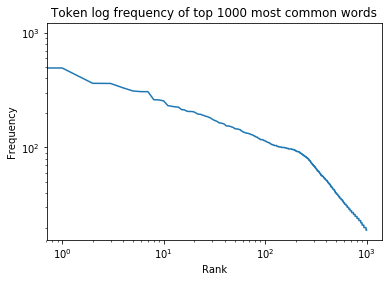

In [7]:
# Plot of token log frequency of input.txt
plt.loglog([freq for word, freq in freq_dist.most_common(1000)])
plt.xlabel('Rank')
plt.ylabel('Frequency')
plt.title('Token log frequency of top 1000 most common words')
plt.show()

This plot shows the appearance frequency of the top 1000 most common words. According to Zipf's law, the most frequent words in a text are the least informative. This will roughly help us identify the significance of each token.

### Gold data

In [8]:
# Read in four gold files separately
corpus_gold_dev = []
gold_dev_text_list = []
gold_dev_list = []
with open('dev.txt') as file:
    for line in file:
        twi = line.strip().split('\t')
        tweet_id, label, tweet = twi[0], twi[1], ' '.join(twi[2:])
        tokens, word_count, char_count=process(tweet)
        
        corpus_gold_dev.extend(tokens)
        gold_dev_text_list.append(tokens)
        
        dict = {'id': tweet_id,
                'label': label,
                'text': ' '.join(tokens),
                'word_count': word_count,
                'char_count': char_count,
        }
        gold_dev_list.append(dict)

In [9]:
corpus_gold_devtest = []
gold_devtest_text_list = []
gold_devtest_list =[]
with open('devtest.txt') as file:
    for line in file:
        twi = line.strip().split('\t')
        tweet_id, label, tweet = twi[0], twi[1], ' '.join(twi[2:])
        tokens, word_count, char_count=process(tweet)
        
        corpus_gold_devtest.extend(tokens)
        gold_devtest_text_list.append(tokens)
        
        dict = {'id': tweet_id,
                'label': label,
                'text': ' '.join(tokens),
                'word_count': word_count,
                'char_count': char_count,
        }
        gold_devtest_list.append(dict)

In [10]:
corpus_gold_test = []
gold_test_text_list = []
gold_test_list =[]
with open('test.txt') as file:
    for line in file:
        twi = line.strip().split('\t')
        tweet_id, label, tweet = twi[0], twi[1], ' '.join(twi[2:])
        tokens, word_count, char_count = process(tweet)
        
        corpus_gold_test.extend(tokens)
        gold_test_text_list.append(tokens)
       
        dict = {'id': tweet_id,
                'label': label,
                'text': ' '.join(tokens),
                'word_count': word_count,
                'char_count': char_count,
        }
        gold_test_list.append(dict)

In [11]:
corpus_gold_train = []
gold_train_text_list = []
gold_train_list =[]
with open('train.txt') as file:
    for line in file:
        twi = line.strip().split('\t')
        tweet_id, label, tweet = twi[0], twi[1], ' '.join(twi[2:])
        tokens, word_count, char_count = process(tweet)
        
        corpus_gold_train.extend(tokens)
        gold_train_text_list.append(tokens)
        
        dict = {'id': tweet_id,
                'label': label,
                'text': ' '.join(tokens),
                'word_count': word_count,
                'char_count': char_count,
        }
        gold_train_list.append(dict)

In [12]:
# Oov words are those that appear in INPUT.txt that are not in training data.
diff1 = set(corpus) - set(corpus_gold_dev)
diff2 = set(corpus) - set(corpus_gold_devtest)
diff3 = set(corpus) - set(corpus_gold_test)
diff4 = set(corpus) - set(corpus_gold_train)
print("Total number of words that are in INPUT.txt but not in training data:",len(diff1) + len(diff2) + len(diff3) + len(diff4))

Total number of words that are in INPUT.txt but not in training data: 58617


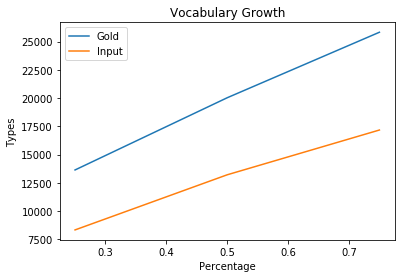

In [13]:
gold_tweet_list = gold_dev_text_list + gold_devtest_text_list + gold_test_text_list + gold_train_text_list
def voc_growth(text_list):
    length = len(text_list)
    quarter = text_list[:(length//4)]
    q = []
    for line in quarter:
        q.extend(line)
    
    half = text_list[:(length//2)]
    h = []
    for line in half:
        h.extend(line)
    
    three_fourths = text_list[:(length*3//4)]
    t = []
    for line in three_fourths:
        t.extend(line)
    return len(set(q)), len(set(h)), len(set(t))
gold_quarter, gold_half, gold_tf = voc_growth(gold_tweet_list)
input_quarter, input_half, input_tf = voc_growth(tweet_text_list)
fig = plt.figure()
ax1 = fig.add_subplot(111)
ax1.plot([0.25, 0.5, 0.75], [gold_quarter, gold_half, gold_tf], label = 'Gold')
ax1.plot([0.25, 0.5, 0.75], [input_quarter, input_half, input_tf], label = "Input")
plt.legend(loc = 'upper left')
plt.title('Vocabulary Growth')
plt.xlabel('Percentage')
plt.ylabel('Types')
plt.show()

In [14]:
positive = []
negative = []
neutral = []
# a function to count the total number of positive, negative and neutral tweets
def distribution(file):
    pos = 0
    neg = 0
    neu = 0
    for line in file:
        if line['label'] == 'positive':
            pos +=1
            positive.extend(line['text'].split(" "))
        elif line['label'] == 'neutral':
            neu +=1
            neutral.extend(line['text'].split(" "))
        elif line['label'] == 'negative':
            neg +=1
            negative.extend(line['text'].split(" "))
    print("\tPositive:", pos, "\n\tNeutral:", neu, "\n\tNegative:",neg)
print("Total in Gold:")
distribution(gold_dev_list + gold_devtest_list + gold_test_list + gold_train_list)
print("In Gold/dev.txt:")
distribution(gold_dev_list)
print("In Gold/devtest.txt:")
distribution(gold_devtest_list)
print("In Gold/test.txt:")
distribution(gold_test_list)
print("In Gold/train.txt:")
distribution(gold_train_list)

Total in Gold:
	Positive: 11990 
	Neutral: 13831 
	Negative: 4810
In Gold/dev.txt:
	Positive: 843 
	Neutral: 765 
	Negative: 391
In Gold/devtest.txt:
	Positive: 994 
	Neutral: 681 
	Negative: 325
In Gold/test.txt:
	Positive: 7059 
	Neutral: 10342 
	Negative: 3231
In Gold/train.txt:
	Positive: 3094 
	Neutral: 2043 
	Negative: 863


In [15]:
# Look at the difference between the top word types across these three classes
freq_pos = FreqDist(positive)
top_pos = freq_pos.most_common(100)
print(top_pos)

[('tomorrow', 4418), ('may', 3478), ('th', 3072), ('day', 2960), ('see', 2170), ("i'm", 1906), ('friday', 1822), ('night', 1704), ('going', 1670), ('st', 1470), ('sunday', 1404), ('time', 1394), ('good', 1266), ('like', 1210), ('one', 1198), ('new', 1174), ('get', 1164), ('go', 1144), ('nd', 1128), ('love', 1118), ('best', 1096), ('monday', 1074), ('saturday', 1068), ('happy', 1024), ('today', 944), ('rd', 848), ('great', 844), ('watch', 780), ('back', 748), ('thursday', 742), ('want', 736), ('david', 718), ("can't", 696), ('make', 692), ('last', 682), ('tonight', 680), ('birthday', 676), ('know', 676), ('game', 670), ('ice', 658), ('national', 628), ('got', 626), ('sun', 620), ('us', 620), ('wait', 610), ('come', 606), ('first', 590), ('still', 578), ('next', 552), ('hope', 552), ('think', 550), ('big', 550), ('morning', 532), ('world', 522), ('u', 512), ('would', 502), ("i'll", 496), ('show', 494), ('watching', 492), ('gonna', 488), ('hot', 488), ('win', 486), ('really', 472), ('star

In [16]:
freq_neu = FreqDist(neutral)
top_neu = freq_neu.most_common(100)
print(top_neu)

[('may', 4922), ('th', 3760), ('tomorrow', 3282), ('st', 1938), ('like', 1530), ('day', 1522), ('sunday', 1508), ('friday', 1462), ('going', 1456), ('night', 1382), ('time', 1322), ('get', 1310), ('nd', 1280), ('rd', 1258), ("i'm", 1248), ('see', 1200), ('new', 1184), ('one', 1164), ('know', 1096), ('monday', 1088), ('go', 1018), ('david', 1018), ('want', 924), ('saturday', 890), ('think', 868), ('still', 802), ('game', 788), ('john', 774), ('make', 754), ('sun', 736), ('sox', 724), ('thursday', 720), ('first', 700), ('back', 696), ('u', 690), ('last', 688), ('would', 658), ('watch', 658), ('said', 620), ('milan', 612), ('white', 606), ('us', 598), ('today', 596), ('sat', 594), ('tuesday', 582), ('paul', 560), ('frank', 546), ('take', 540), ('september', 538), ('next', 520), ('got', 516), ('real', 508), ('come', 504), ("he's", 504), ('right', 500), ('show', 496), ('august', 468), ('big', 462), ('says', 462), ('tonight', 458), ('set', 456), ('raw', 456), ('people', 446), ('well', 444), 

In [17]:
freq_neg = FreqDist(negative)
top_neg = freq_neg.most_common(100)
print(top_neg)

[('may', 2554), ('th', 980), ('tomorrow', 920), ('like', 826), ('st', 746), ('day', 588), ("i'm", 552), ('going', 472), ('get', 454), ('time', 444), ('one', 436), ('nd', 422), ('friday', 410), ('see', 400), ('rd', 390), ('sunday', 384), ('people', 380), ('still', 364), ('muslims', 356), ('want', 344), ('think', 338), ('make', 314), ('go', 300), ('know', 286), ('trump', 276), ("can't", 274), ('u', 268), ('shit', 266), ('us', 262), ('even', 260), ('would', 258), ('sat', 254), ('sun', 252), ('really', 246), ('night', 246), ('monday', 244), ('world', 244), ('ira', 238), ('bad', 236), ("he's", 234), ('got', 226), ('said', 220), ('gay', 218), ('never', 216), ('last', 216), ('haram', 216), ('big', 214), ('christians', 214), ('boko', 212), ('fuck', 210), ('islam', 210), ('well', 208), ('today', 206), ('back', 204), ('say', 202), ('ever', 202), ('right', 202), ('iran', 196), ('israel', 196), ('new', 194), ('good', 190), ('charlie', 190), ('saturday', 188), ('yakub', 188), ('hebdo', 188), ('fran

In [18]:
print(freq_dist.most_common(50))

[('trump', 1009), ('like', 494), ('get', 363), ('people', 362), ('one', 331), ('us', 311), ('new', 307), ("i'm", 307), ('would', 261), ('obama', 260), ('white', 255), ('know', 232), ('vote', 229), ('time', 226), ('kim', 225), ('love', 214), ('think', 213), ('news', 207), ('u', 206), ('voter', 206), ('see', 204), ('need', 199), ('day', 195), ('good', 195), ('still', 192), ('go', 190), ('thanksgiving', 187), ('want', 186), ('clinton', 183), ('right', 181), ('bannon', 177), ('bad', 174), ('isis', 172), ('steve', 170), ('world', 168), ('make', 164), ('foundation', 164), ('melania', 163), ('israel', 162), ("can't", 161), ('say', 159), ('great', 155), ('first', 154), ('really', 154), ('w', 154), ('going', 153), ('liberals', 152), ('got', 151), ('security', 150), ('back', 149)]


What words are particularly characteristic of your training set and dev set? Are they the same?

<br>Between the three sets, most of the common words are neutral in semantic sense, and they are very similar in general. But we can still see some characteristic words in each class. For example, words showing positive feelings like "love", "best", "happy" and "great", and curse words showing negative feelings like "shit".

<br>It's also worth mention that from negative to neutral to positive classes' tweets, words like "tomorrow", "good" or "new" tends to be more frequent.

<br>Proper nouns like "amazon" appears in both positive and negative most frequent list, but "prime" only appears in list of most frequent negative tweets.

<br>In the dev set, the most common words shows a combination of three classes, and a closer connection with political issues; unlike the training sets' connection to both politics and pop/celebrity culture.

# Task 2: Message Polarity

### classifier 1: Naive Bayes

In [26]:
import numpy as np
import pandas as pd
import nltk
from nltk.corpus import brown
from nltk.corpus import webtext
from nltk.tokenize import RegexpTokenizer
from nltk.probability import ConditionalFreqDist
from nltk.probability import FreqDist
from tokenizer import tokenize, TOK
from nltk.tokenize import sent_tokenize, word_tokenize

#from tokenize import sent_tokenize, word_tokenize
import random
from nltk.classify import NaiveBayesClassifier
from nltk.sentiment.util import *
import sklearn
from sklearn.metrics import confusion_matrix
import seaborn as sn
import matplotlib.pyplot as plt
#from sklearn import cross_validate

In [27]:
# read as csv
train = pd.read_csv('train.txt',delimiter='\t')
train.columns=['id','class','tweet']

dev = pd.read_csv('dev.txt',delimiter='\t')
dev.columns=['id','class','tweet']

devtest = pd.read_csv('devtest.txt',delimiter='\t')
devtest.columns=['id','class','tweet']

test = pd.read_csv('test.txt',delimiter='\t')
test.columns=['id','class','tweet','a']
test.drop(["a"], axis = 1, inplace = True) 

In [28]:
# combine data into one table
data=pd.concat([train,dev, devtest, test])

In [29]:
# alldata
pos_data = data[data['class'] == 'positive']
neg_data = data[data['class'] == 'negative']
neutral_data = data[data['class'] == 'neutral']

pos_tweets_data = pos_data['tweet'].tolist()
neg_tweets_data = neg_data['tweet'].tolist()
neutral_tweets_data = neutral_data['tweet'].tolist()

In [30]:
# define the method of tokenization
def tok(tweets):
    
    tok_tweets=tokenize(tweets)
    words=[]
    for token in tok_tweets:
        if TOK.descr[token.kind]=='WORD':
            words.append(token.txt)

    return words

In [31]:
# recall the tok function and transfer tokens from list to a dictionary
def display(tweet):

    a=tok(tweet)
    truelist=[]
    for i in range(0, len(a)):
        truelist.append(True)
    return dict(zip(a,truelist))

In [33]:
del dict

In [34]:
# prepare data for corss-validation
pos=[(display(tweet),'positive') for tweet in pos_tweets_data]
neg=[(display(tweet),'negative') for tweet in neg_tweets_data]
neutral=[(display(tweet),'neutral') for tweet in neutral_tweets_data]

all_data=pos+neg+neutral

random.seed(1200)
random.shuffle(all_data)


In [35]:
# cross validate the model and get the accuracy
num_folds = 10
subset_size = int(len(all_data)/num_folds)
accuracy=[]
for i in range(num_folds):
    testing_this_round = all_data[i*subset_size:][:subset_size]
    training_this_round = all_data[:i*subset_size] + all_data[(i+1)*subset_size:]
    classifier = nltk.NaiveBayesClassifier.train(testing_this_round)
    accuracy.append(nltk.classify.accuracy(classifier, training_this_round))


print('The accuracy of the model is ',sum(accuracy)/10)

The accuracy of the model is  0.49058214181499854


In [36]:
# predict classes to all data
data_tweet=data['tweet'].tolist()
data_class_input=[]
for tweet in data_tweet:
    tokens=display(tweet)
    data_class_input.append(classifier.classify(dict([token, True] for token in tokens)))
data['predict']=data_class_input

In [37]:
# confusion matrix
y_true = data['class']
y_pred = data['predict']
NB_cm = confusion_matrix(y_true, y_pred)
NB_cm

array([[3675,  610,  511],
       [5388, 5013, 3366],
       [2670, 1865, 7364]], dtype=int64)

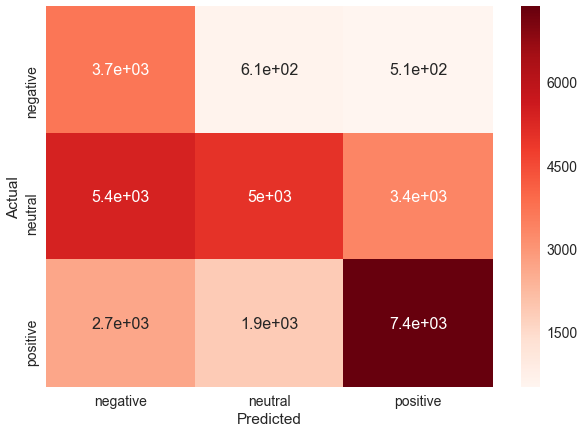

In [38]:
# heat map of confusion matrix
NB_cm_df = pd.DataFrame(NB_cm, columns = np.unique(y_true), index = np.unique(y_true))
NB_cm_df.index.name = 'Actual'
NB_cm_df.columns.name = 'Predicted'
plt.figure(figsize = (10,7))
sn.set(font_scale=1.4)
sn.heatmap(NB_cm_df, cmap="Reds", annot=True, annot_kws={"size": 16})
#sn.distplot()
plt.show()

In [80]:
# read input
input_data = pd.read_csv('INPUT.txt',delimiter='\t')
input_data.columns=['id','class','tweet']
input_tweet=input_data['tweet'].tolist()

# classify tweets in INPUT
class_input=[]
for tweet in input_tweet:
    tokens=display(tweet)
    class_input.append(classifier.classify(dict([token, True] for token in tokens)))
input_data['class']=class_input
input_data = input_data.drop(columns=['tweet']) 
# save the output of INPUT into a csv file
input_data.to_csv('input_classification.csv',index=False)

In [81]:
input_data[:5]

,id,class
0,801989272341453952,neutral
1,801990978424962944,neutral
2,801996232553963008,positive
3,801998343442407040,neutral
4,802001659970744064,positive


### classifier 2: Vader

In [39]:
import pandas as pd
import numpy as np
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from sklearn.metrics import confusion_matrix
import seaborn as sn
import matplotlib.pyplot as plt

#Download vader lexicon
#nltk.download('vader_lexicon')

In [40]:
# Read in all datasets
train = pd.read_csv('train.txt',delimiter='\t')
train.columns=['id','class','tweet']

dev = pd.read_csv('dev.txt',delimiter='\t')
dev.columns=['id','class','tweet']

devtest = pd.read_csv('devtest.txt',delimiter='\t')
devtest.columns=['id','class','tweet']

test = pd.read_csv('test.txt',delimiter='\t')
test.columns=['id','class','tweet','a']
test.drop(["a"], axis = 1, inplace = True) 


In [41]:
# Combine all data into one table
data=pd.concat([train, dev, devtest, test])
data[:5]

,id,class,tweet
0,628976607420645377,negative,@Microsoft how about you make a system that do...
1,629023169169518592,negative,I may be ignorant on this issue but... should ...
2,629179223232479232,negative,"Thanks to @microsoft, I just may be switching ..."
3,629186282179153920,neutral,If I make a game as a #windows10 Universal App...
4,629226490152914944,positive,"Microsoft, I may not prefer your gaming branch..."


In [42]:
# Convert dataframe to a list of dictionary
data_list = data.to_dict(orient = 'records')
data_list[:3]

[{'id': 628976607420645377,
  'class': 'negative',
  'tweet': "@Microsoft how about you make a system that doesn't eat my friggin discs. This is the 2nd time this has happened and I am so sick of it!"},
 {'id': 629023169169518592,
  'class': 'negative',
  'tweet': "I may be ignorant on this issue but... should we celebrate @Microsoft's parental leave changes? Doesn't the gender divide suggest... (1/2)"},
 {'id': 629179223232479232,
  'class': 'negative',
  'tweet': 'Thanks to @microsoft, I just may be switching over to @apple.'}]

In [43]:
# Create vader analyzer
v_analyzer = SentimentIntensityAnalyzer()

# Define function to use Vader Classifier
def vader_classifier(dl):
    
    for i in range(len(dl)):

        # Compute vader score for each tweet
        v_score = v_analyzer.polarity_scores(dl[i]['tweet'])

        # Classify tweet as negative if compound <= -0.05
        if v_score['compound'] <= -0.05:
            predict = "negative"
        # Classify tweet as positive if compound >= 0.05
        elif v_score['compound'] >= 0.05:
            predict = 'positive'
        # Classify tweet as neutral if compound <0.05 and >-0.05
        else:
            predict = 'neutral'

        # Add the vader score and prediction into the list of dictionary
        dl[i].update([("v_socre" , v_score), ("predict" , predict)])
        

In [44]:
# Apply Vader Classifier to data_list
vader_classifier(data_list)

# Check the list of dictionary after adding results
data_list[:3]

[{'id': 628976607420645377,
  'class': 'negative',
  'tweet': "@Microsoft how about you make a system that doesn't eat my friggin discs. This is the 2nd time this has happened and I am so sick of it!",
  'v_socre': {'neg': 0.153, 'neu': 0.847, 'pos': 0.0, 'compound': -0.674},
  'predict': 'negative'},
 {'id': 629023169169518592,
  'class': 'negative',
  'tweet': "I may be ignorant on this issue but... should we celebrate @Microsoft's parental leave changes? Doesn't the gender divide suggest... (1/2)",
  'v_socre': {'neg': 0.137, 'neu': 0.708, 'pos': 0.154, 'compound': 0.34},
  'predict': 'positive'},
 {'id': 629179223232479232,
  'class': 'negative',
  'tweet': 'Thanks to @microsoft, I just may be switching over to @apple.',
  'v_socre': {'neg': 0.0, 'neu': 0.756, 'pos': 0.244, 'compound': 0.4404},
  'predict': 'positive'}]

In [45]:
# Convert the list of dictionary to a new dataframe
data_new = pd.DataFrame(data_list)
data_new[:5]

# Compute the accuracy
print("The accuracy of Vader Classifier is ", np.mean(data_new["class"] == data_new["predict"]))


The accuracy of Vader Classifier is  0.5140502921672904


In [46]:
# Create a confusion matrix for the classification
y_true = data_new['class']
y_pred = data_new['predict']
v_cm = confusion_matrix(y_true, y_pred)
v_cm

array([[2865,  738, 1193],
       [3273, 4981, 5513],
       [1397, 2689, 7813]], dtype=int64)

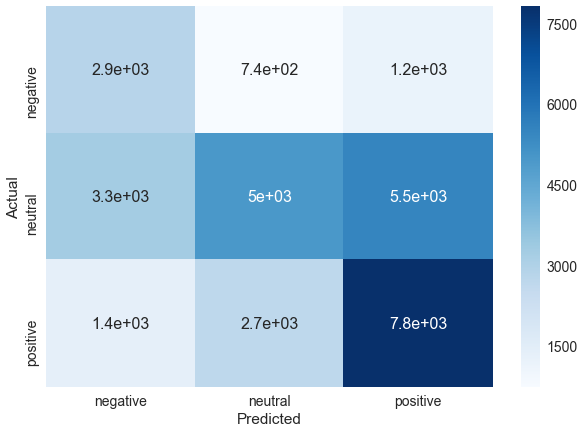

In [47]:
# Create a confusion matrix visualization
v_cm_df = pd.DataFrame(v_cm, columns = np.unique(y_true), index = np.unique(y_true))
v_cm_df.index.name = 'Actual'
v_cm_df.columns.name = 'Predicted'
plt.figure(figsize = (10,7))
sn.set(font_scale=1.4)
sn.heatmap(v_cm_df, cmap="Blues", annot=True, annot_kws={"size": 16})


# Task 3: Performance evaluation 

In [54]:
## NB 
#recall for negative, netural, positive
print('In Naive Bayes model, recall for negative is',(3700)/(3700+610+510))
print('In Naive Bayes model, recall for neutral is',(5000)/(5400+5000+3400))
print('In Naive Bayes model, recall for positive is',(7400)/(2700+1900+7400))
#precision for negative, netural, positive
print('In Naive Bayes model, precision for negative is',(3700)/(3700+5400+2700))
print('In Naive Bayes model, precision for neutral is',(5000)/(610+5000+1900))
print('In Naive Bayes model, precision for positive is',(7400)/(7400+3400+510))

In Naive Bayes model, recall for negative is 0.7676348547717843
In Naive Bayes model, recall for neutral is 0.36231884057971014
In Naive Bayes model, recall for positive is 0.6166666666666667
In Naive Bayes model, precision for negative is 0.3135593220338983
In Naive Bayes model, precision for neutral is 0.6657789613848203
In Naive Bayes model, precision for positive is 0.654288240495137


In [55]:
## Vader 
#recall for negative, netural, positive
print('In Vader, recall for negative is',(2900)/(2900+740+1200))
print('In Vader, recall for neutral is',(5000)/(5000+3300+5500))
print('In Vader, recall for positive is',(7800)/(7800+2700+1400))
#precision for negative, netural, positive
print('In Vader, precision for negative is',(2900)/(2900+3300+1400))
print('In Vader, precision for neutral is',(5000)/(740+5000+2700))
print('In Vader, precision for positive is',(7800)/(1200+5500+7800))

In Vader, recall for negative is 0.5991735537190083
In Vader, recall for neutral is 0.36231884057971014
In Vader, recall for positive is 0.6554621848739496
In Vader, precision for negative is 0.3815789473684211
In Vader, precision for neutral is 0.5924170616113744
In Vader, precision for positive is 0.5379310344827586


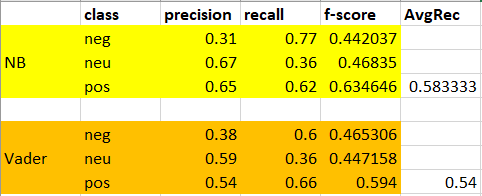

In [56]:
from IPython.display import Image
Image("performance.png")

From the above table, we see that Naive Bayes model has higher precision on neural and positive tweets, while Vader gives better precision score on negative tweets. Naive Bayes model has higher recall for negative tweets and lower precision score on positive tweets. As for f-score, both models reach the highest score for positive tweets. In general, Naive Bayes model performs better than Vader model based on Average Recall. 

Naive Bayes model has a low precision score on negative tweets. One explanation is that there are fewer negative tweets in the trianing data than the other two classes. Thus it is important to have a balanced training set for naive bayes model. Even though each model has slightly different scores on each class, there aren't distinct differences between the two models. 

Tokenization is important in both models. We think it is especially important in Vader model, since it effects how words are being tokenized thus different tokenization methods would have different matches with the lexicons. 

If we have more time, we will make the following improvements
    <br>1. Try different tokenization methods and tokenize the text with regular expression.
    <br>2. Make dev set to tune model parameters.
    <br>3. Use undersampling technique to balance the training set so that each class is equally distributed. 
    <br>4. Add more sentiment lexicons to the Vader. 